# Laboratory exercise 3

Required packages:
* numpy
* torch
* torchvision
* scikit-learn

**Tasks that should be solved are given in the following sections:**
* Section 5.3 The XOR problem
* Section 5.4 The MNIST dataset
* Section 6.1 Kernels
* Section 6.2 Wine dataset
* Section 6.3 Speed

# Exercise 5: Multilayer perceptron

The focus of this exercise will be on multilayer perceptron and to do that in a simpler way, an introduction to PyTorch is given first.

## 5.1 Introduction to PyTorch

We'll introduce Pytorch by quoting the [official documentation: ](https://pytorch.org/docs/stable/index.html)

> "PyTorch is an optimized tensor library for deep learning using GPUs and CPUs."

PyTorch is [open source](https://github.com/pytorch/pytorch/tree/main#license) and [one of the most popular](https://www.kaggle.com/code/paultimothymooney/kaggle-survey-2022-all-results?scriptVersionId=107352619&cellId=45) machine learning libraries. It is simple to use and is well integrated into Python. We highly recommend that you read the [official quickstart tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) to further familiarize yourself with PyTorch. For any additional clarification, we suggest that you examine the [official documentation](https://pytorch.org/docs/stable/index.html). This exercise is heavily based on the mentioned documents.

We'll start by importing PyTorch and [NumPy](https://numpy.org/):

In [135]:
import torch
import torchvision
import numpy as np
import sklearn as skl

### 5.1.1 PyTorch basics
The fundamental elements of PyTorch are tensors. They are used to encode the input data, output data and the parameters of the model. Tensors are n-dimensional arrays of a given type. They are quite similar to NumPy ndarrays and we can easily integrate Numpy ndarrays into PyTorch. We can define tensors in multiple ways - we'll start by defining tensors directly from data:

In [136]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

We can list the tensors attributes with the following commands:

In [137]:
print(f"Tensor shape    : {x_data.shape}")
print(f"Tensor datatype : {x_data.dtype}")
print(f"Tensor device   : {x_data.device}")

Tensor shape    : torch.Size([2, 2])
Tensor datatype : torch.int64
Tensor device   : cpu


We can also create tensors using functions:

In [138]:
shape = (2,3,)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
rand_tensor = torch.rand(shape) # samples from the uniform distribution on [0, 1)
norm_tensor = torch.normal(0.0, 1.0, shape) # sample from the normal distribution with μ = 0, σ = 1


We can also define tensors from a NumPy array:

In [139]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

And we can also define tensors using other tensors. The newly defined tensor will have the same properties as the argument tensor, unless we tell it to override some properties.

In [140]:
print('--- original tensor ----------------------------- new tensor ------------------')
x_ones = torch.ones_like(x_data) # keeping the same properties
print(f"x_data shape    : {x_data.shape} \t | x_ones shape    : {x_ones.shape}")
print(f"x_data datatype : {x_data.dtype} \t\t | x_ones datatype : {x_ones.dtype}")
print(f"x_data device   : {x_data.device} \t\t\t | x_ones device   : {x_ones.device}")

print('-------------------------------------------------------------------------------')

x_rand = torch.rand_like(x_data, dtype=torch.float) # overriding the datatype property
print(f"x_data shape    : {x_data.shape} \t | x_rand shape    : {x_rand.shape}")
print(f"x_data datatype : {x_data.dtype} \t\t | x_rand datatype : {x_rand.dtype}")
print(f"x_data device   : {x_data.device} \t\t\t | x_rand device   : {x_rand.device}")

--- original tensor ----------------------------- new tensor ------------------
x_data shape    : torch.Size([2, 2]) 	 | x_ones shape    : torch.Size([2, 2])
x_data datatype : torch.int64 		 | x_ones datatype : torch.int64
x_data device   : cpu 			 | x_ones device   : cpu
-------------------------------------------------------------------------------
x_data shape    : torch.Size([2, 2]) 	 | x_rand shape    : torch.Size([2, 2])
x_data datatype : torch.int64 		 | x_rand datatype : torch.float32
x_data device   : cpu 			 | x_rand device   : cpu


### 5.1.2 Hardware acceleration
You might wonder what does the `device` property describe? PyTorch follows a [simple and explicit design philosophy](https://pytorch.org/docs/stable/community/design.html#principle-2-simple-over-easy) and this is reflected in the way we allocate our tensors to actual hardware. By default, all tensors are allocated on the CPU and we have to manually move them to the GPU. [The official quickstart tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html#creating-models) shows us a nice and effective method of doing this:

In [141]:
# check the device availability

# move the tensor to the device
x_data = x_data.to(device)
print(f"x_data shape    : {x_data.shape}")
print(f"x_data datatype : {x_data.dtype}")
print(f"x_data device   : {x_data.device}")

x_data shape    : torch.Size([2, 2])
x_data datatype : torch.int64
x_data device   : cuda:0


Obviously you need to have the appropriate hardware and environment configuration in order to allow PyTorch to utilize your hardware. Depending on your environment, you will need to:
* Local environment → install the appropriate device drivers
  * depends on your operating system and the device you're using
  * you will also need to install the PyTorch version that supports your hardware
* Google Collab → enable hardware acceleration
  * select `Runtime > Change runtime type`, then choose the appropriate hardware (ex. `T4 GPU`)

### 5.1.3 Tensor operations
PyTorch provides [a large number of tensor operations](https://pytorch.org/docs/stable/torch.html) that can be hardware accelerated. If you're familiar with NumPy, using these operations will feel quite natural. First let's try some arithmetic operations:

In [142]:
tensor = torch.rand_like(rand_tensor)
tensor.to(device)

add_tensor = tensor + tensor            # equivalent to torch.add(tensor, tensor)
mul_tensor = tensor * 10                # equivalent to torch.mul(tensor, 10)

trans_tensor = tensor.T                 # equivalent to torch.t*tensor)
element_wise_product = tensor * tensor  # equivalent to torch.mul(tensor, tensor)
matrix_product = tensor @ tensor.T      # equivalent to torch.matmul(tensor, tensor.T)

print("starting tensor...", tensor, sep='\n')
print("added tensor...", add_tensor, sep='\n')
print("multiplied tensor...", mul_tensor, sep='\n')
print("transposed tensor...", trans_tensor, sep='\n')
print("element-wise product tensor...", element_wise_product, sep='\n')
print("matrix product tensor...", matrix_product, matrix_product.device, sep='\n')

starting tensor...
tensor([[0.4149, 0.2381, 0.8549],
        [0.5753, 0.8374, 0.6372]])
added tensor...
tensor([[0.8299, 0.4763, 1.7098],
        [1.1506, 1.6748, 1.2743]])
multiplied tensor...
tensor([[4.1495, 2.3814, 8.5488],
        [5.7530, 8.3739, 6.3717]])
transposed tensor...
tensor([[0.4149, 0.5753],
        [0.2381, 0.8374],
        [0.8549, 0.6372]])
element-wise product tensor...
tensor([[0.1722, 0.0567, 0.7308],
        [0.3310, 0.7012, 0.4060]])
matrix product tensor...
tensor([[0.9597, 0.9828],
        [0.9828, 1.4382]])
cpu


PyTorch tensors can be indexed and sliced in a [similar way to NumPy ndarrays](https://numpy.org/devdocs/user/quickstart.html#indexing-slicing-and-iterating):

In [143]:
tensor = torch.rand(5, 5)
second_row = tensor[1]
third_collumn = tensor[:, 2]
second_to_last_collumn = tensor[..., -2]
assign_tesnor = torch.ones_like(tensor)
assign_tesnor[1:3, 1:3] = 10 # multiple element assignment

print("starting tensor...", tensor, sep='\n')
print("second_row ...", second_row, sep='\n')
print("third collumn ...", third_collumn, sep='\n')
print("second to last collumng...", second_to_last_collumn, sep='\n')
print("assignment tensor...", assign_tesnor, sep='\n')

starting tensor...
tensor([[0.6813, 0.4618, 0.2271, 0.3393, 0.8046],
        [0.1282, 0.2248, 0.5965, 0.1891, 0.0054],
        [0.3551, 0.6324, 0.8811, 0.2877, 0.5041],
        [0.4195, 0.3753, 0.3701, 0.9037, 0.9356],
        [0.3657, 0.4550, 0.9683, 0.7939, 0.5158]])
second_row ...
tensor([0.1282, 0.2248, 0.5965, 0.1891, 0.0054])
third collumn ...
tensor([0.2271, 0.5965, 0.8811, 0.3701, 0.9683])
second to last collumng...
tensor([0.3393, 0.1891, 0.2877, 0.9037, 0.7939])
assignment tensor...
tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1., 10., 10.,  1.,  1.],
        [ 1., 10., 10.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]])


Operations with the `_` suffix denote the in-place operations. They will store the resulting tensor into the argument tensor.

In [144]:
assign_tesnor.mul_(10)

tensor([[ 10.,  10.,  10.,  10.,  10.],
        [ 10., 100., 100.,  10.,  10.],
        [ 10., 100., 100.,  10.,  10.],
        [ 10.,  10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.,  10.]])

### 5.1.4 Datasets and dataloaders
Even though we can store our data directly into tensors and work directly with them, a preferred method for working with data is to use the `Dataset` and `Dataloader` objects. This will also allow us to decouple our data loading code from the model training code. In order to load our data, we have to create a new class that extends the `Dataset` class. We also need to implement the following methods:

* `__init__` - initializes the `Dataset` object
* `__len__` - returns the number of samples in our object
* `__getitem__` - returns the sample for a given index *(remember to return the (input, output) pair)*

Let's generate a synthetic dataset that we'll later use for our simple linear regression model. Our dataset will have 100 samples. The input will be a 3-dimensional tensor, and the output will be a 1-dimensional tensor. The inputs will be normally distributed ($\mu = 0$, $\sigma = 1$) and our model will be defined with the following expression : $y=\mathbf{w}^{T}\mathbf{x}+\mathbf{b}$.

We'll start by defining our custom dataset class:

In [145]:
from torch.utils.data import Dataset

class CustomDatasetAlpha(Dataset):                                    # extending the Dataset class ...
    def __init__(self, number_of_samples, weights, bias):             # our dataset is defined by:
        self.number_of_samples = number_of_samples                    #  - the number of samples
        self.weights = weights                                        #  - the weights vector
        self.bias = bias                                              #  - the bias vector
        
        self.x_input = torch.normal(0.0, 1.0, (number_of_samples, 3)) # sampling our inputs

    def __len__(self):
        return self.number_of_samples

    def __getitem__(self, index):
        # we're assuming that our input and weights are
        # represented as row vectors. Therefore, we'll 
        # calculate the dot product as such:
        input = self.x_input[index]
        output = self.x_input[index] @ self.weights.T + self.bias     # the model expression
        return input, output

After we've defined our dataset, we can instantiate it with the following:

In [146]:
weights = torch.tensor([9.0, 8.0, 7.0])
bias = torch.tensor([5.0])
dataset = CustomDatasetAlpha(100, weights, bias)

We can access our data by simply indexing our dataset:

In [147]:
print("6th samples of the dataset")
print(dataset[5])

print("last 5 samples of the dataset")
print(dataset[-6:-1])

6th samples of the dataset
(tensor([-1.0056, -1.6830, -0.1954]), tensor([-18.8825]))
last 5 samples of the dataset
(tensor([[-0.1073, -1.6054, -0.1945],
        [-0.2524,  0.6484, -0.2847],
        [-0.7224, -0.2019,  0.1298],
        [ 0.6642,  1.2826,  0.6453],
        [ 0.5675,  0.2806,  1.0902]]), tensor([-10.1709,   5.9222,  -2.2091,  25.7557,  19.9840]))


With our `Dataset` object we can access our samples directly. We could implement additional methods for obtaining multiple samples, data shuffling,... but instead we can use the useful `DataLoader` class that will abstract this complexity for us. This can be done with the following:

In [148]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# iterating trough the DataLoader
for batch_x, batch_y in dataloader:
    print("current batch inputs :", batch_x, sep='\n')
    print("current batch outputs :", batch_y, sep='\n')
    
    # we'll break after the first iteration in order to
    # minimize the printed output
    break

current batch inputs :
tensor([[ 0.5675,  0.2806,  1.0902],
        [-0.3069,  0.6068, -0.8679],
        [ 0.9818, -0.2424, -0.3229],
        [ 0.5580,  0.6376, -1.4590],
        [-0.4041, -0.4393, -1.2053],
        [-0.2524,  0.6484, -0.2847],
        [-0.7200, -0.9394,  0.3161],
        [-2.4839, -0.5268, -1.1602]])
current batch outputs :
tensor([[ 19.9840],
        [  1.0163],
        [  9.6362],
        [  4.9102],
        [-10.5882],
        [  5.9222],
        [ -6.7827],
        [-29.6910]])


If you re-run the previous cell you should see different samples in our batch, since we've set the `shuffle` flag to be true. Hopefully this demonstrates the usefulness of the `DataLoader` class. Feel free to explore [other flags](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) and other [data loading utilities](https://pytorch.org/docs/stable/data.html#module-torch.utils.data).

When it comes to loading images, PyTorch provides an additional library named `torchvision` that contains a lot helpful functions for working with images. It also contains a lot of popular datasets and model architectures that are commonly used in computer vision. If you're interested in loading your own images, check out the official [Datasets & DataLoaders tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files). We'll use `torchvision` later on in this exercise in order to load [the MNIST dataset](http://yann.lecun.com/exdb/mnist/), a quite popular image dataset for testing our machine learning models.


### 5.1.5 Models
Now we'll discuss how to create our models using PyTorch. All models in PyTorch extend the `nn.Module` class, similarly how datasets extend the `Dataset` class. During the initialization of the model, we'll define our network's architecture. We'll also define the `forward` method that will calculate the forward pass of our network. Let's start by defining a simple linear regression model:

In [149]:
from torch import nn

class NeuralNetworkAlpha(nn.Module):          # extending the nn.Module...
    def __init__(self):                       # we won't need any additional parameters
        super().__init__()                    # calling the constructor of the parent class
        self.linear_layer = nn.Linear(3, 1)   # linear layer with input size of 3, output size of 1
                                              # to model linear regression

    def forward(self, x):                     # defining the forward pass
        return self.linear_layer(x)

Recall that a single layered neural network with linear activation models linear regression. PyTorch provides [a large ammount of layers](https://pytorch.org/docs/stable/nn.html) and we will give a list of commonly used ones:
* [`Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) - defines a layer with linear activation function
* [`ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) - defines a layer with ReLu activation function
* [`Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid) - defines a layer with sigmoid activation function
* [`Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d) - defines a 2D convolutional layer
* [`Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential) - defines a sequential container which can take other layers and will apply them sequentially
* [`Flatten`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten) - defines a layer that will flatten a multiple dimensional tensor into a single dimension

We'll use some of these layers later on in this exercise. Let's continue by instantiating our network and calculating the output:

In [150]:
# we create our network and move it to previously defined device
network = NeuralNetworkAlpha().to(device)
print("device:" , device)
print("structure of our network...", network, sep='\n')
input_data = dataset[0][0].to(device)

print("first dataset sample...")
print(input_data)
print("target...")
print(dataset[0][1])
print("network's output for the first dataset sample...")

output = network(input_data)
print(output)

device: cuda
structure of our network...
NeuralNetworkAlpha(
  (linear_layer): Linear(in_features=3, out_features=1, bias=True)
)
first dataset sample...
tensor([-1.7344, -0.4203, -0.5024], device='cuda:0')
target...
tensor([-17.4891])
network's output for the first dataset sample...
tensor([-0.6195], device='cuda:0', grad_fn=<ViewBackward0>)


We can inspect the network's parameters with the following:

In [151]:
for name, param in network.named_parameters():
    print(name, param)
    

linear_layer.weight Parameter containing:
tensor([[ 0.3319,  0.5383, -0.3839]], device='cuda:0', requires_grad=True)
linear_layer.bias Parameter containing:
tensor([-0.0105], device='cuda:0', requires_grad=True)


We can see the values of parameters for each layer *(if you want a small exercise, manually verify that the output of our network was correct)*. Let's proceed with this exercise and see how we can use PyTorch to train our network.

### 5.1.6 Parameter optimization
In order to optimize our network using back propagation, we'll need to compute the gradients of the loss function with respect towards each parameter. PyTorch allows us to achieve this with automatic differentiation using `torch.autograd`, it's built-in differentiation engine. If we look back at the previous code cell, we can see that the layers of the network are tensors which have the property `requires_grad` equal to true. This makes the tensor's gradients available to be computed and allows PyTorch to calculate the backward pass for our network. If you want to learn more about the details of gradient calculation, check out the official [Autograd tutorial](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html).

Let's use the [mean squared error](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) as our loss function and compute the gradients for the first dataset sample:

In [152]:
loss_fn = torch.nn.MSELoss()

first_sample = dataset[0]
input = first_sample[0].to(device)
first_prediction = network(input)            # forward
input2 = first_sample[1].to(device)
first_loss = loss_fn(input2, first_prediction)   # pass

print("first sample...", first_sample, sep='\n')
print("first prediction...", first_prediction, sep='\n')
print("MSE loss : ", first_loss)

first_loss.backward()                                   # backward pass

for name, param in network.named_parameters():
    print("gradient of : ", name, param.grad)          # printing the gradients

first sample...
(tensor([-1.7344, -0.4203, -0.5024]), tensor([-17.4891]))
first prediction...
tensor([-0.6195], device='cuda:0', grad_fn=<ViewBackward0>)
MSE loss :  tensor(284.5839, device='cuda:0', grad_fn=<MseLossBackward0>)
gradient of :  linear_layer.weight tensor([[-58.5182, -14.1794, -16.9522]], device='cuda:0')
gradient of :  linear_layer.bias tensor([33.7392], device='cuda:0')


We can see that our network's parameters are stored in the `param.grad` attribute. It is important to see how we've used the loss function:
1) `loss_fn` - what our loss function is
2) `first_loss` - represents the loss for given network predictions and ground truths
3) `first_loss.backward` - propagating the gradients to our parameters

Hopefully this demonstrates how PyTorch calculates and propagates the gradients of our loss function. 

Now we need to apply these gradients to our parameters. This is done with [an `Optimizer`](https://pytorch.org/docs/stable/optim.html). When defining an optimizer we need to provide it with parameters that should be optimized. In our case, these are the network's parameters. PyTorch provides [many optimization algorithms](https://pytorch.org/docs/stable/optim.html#algorithms) that apply gradients to our parameters. We'll use [stochastic gradient descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) as our optimizer. Let's instantiate our network, redefine our data loader, initialize the optimizer and define our hyperparameters:

In [153]:
from torch.optim import SGD

# defining the hyperparameters
epochs, learning_rate, batch_size = 100, 0.1, 100

# redefining the dataloader with the new batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle = True)

# instantiating our network
network = NeuralNetworkAlpha().to(device)

# defining our optimizer for our network's parameters
optimizer = SGD(network.parameters(), lr = learning_rate)

Finally we need to iterate over our whole dataset and repeat the whole process - this is our training loop. Let's proceed with defining our training loop:

In [154]:
for epoch in range(epochs):
    # set the network to training mode
    network.train()

    epoch_loss = 0
    number_of_samples = len(dataloader.dataset)
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)	# moving the data to the device
        # forward pass
        preds = network(X)
        loss = loss_fn(y, preds)
        
        
        # backward pass
        loss.backward()
        optimizer.step()

        # reseting the gradients
        optimizer.zero_grad()

        # updating the epoch loss with the current batch loss
        epoch_loss += loss
    
    # printing the loss value for every 10th epoch
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch} average loss : {epoch_loss/number_of_samples}")

Epoch 9 average loss : 0.030812479555606842
Epoch 19 average loss : 0.00040922133484855294
Epoch 29 average loss : 7.156713763833977e-06
Epoch 39 average loss : 1.3826253564275248e-07
Epoch 49 average loss : 2.794985354270807e-09
Epoch 59 average loss : 5.881158060550007e-11
Epoch 69 average loss : 1.1556323389547152e-12
Epoch 79 average loss : 8.334949890649243e-14
Epoch 89 average loss : 8.334949890649243e-14
Epoch 99 average loss : 8.334949890649243e-14


We can see that the value of the loss function is decreasing, meaning that our network's parameters are being optimized for our training dataset. If we inspect the parameter values of our network:

In [155]:
for name, param in network.named_parameters():
    print(name, param)

linear_layer.weight Parameter containing:
tensor([[9.0000, 8.0000, 7.0000]], device='cuda:0', requires_grad=True)
linear_layer.bias Parameter containing:
tensor([5.0000], device='cuda:0', requires_grad=True)


We can see that we've achieved the same values that we used for our synthetic dataset.

You might wonder why we've called `network.train()` inside our training loop? This is a best practice according to [the official documentation](https://pytorch.org/docs/stable/notes/autograd.html#evaluation-mode-nn-module-eval) :
> It is recommended that you always use `model.train()` when training and `model.eval()` when evaluating your model (validation/testing) even if you aren’t sure your model has training-mode specific behavior, because a module you are using might be updated to behave differently in training and eval modes.

This concludes our introduction to PyTorch.

## 5.3 The XOR problem

XOR samples are not linearly separable. However, they can be separated by introducing non-linearities with our activation function. We'll start by defining our dataset using a helpful wrapper [TensorDataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset):

In [156]:
from torch.utils.data.dataset import TensorDataset

xor_in = torch.tensor([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]], dtype = torch.float)

xor_out = torch.tensor([0, 1, 1, 0], dtype = torch.float) # it is important to use the correct datatype
xor_dataset = TensorDataset(xor_in, xor_out)

Now we'll define our network using a [Sequential container](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#sequential) for our layers. Our network is also parameterized by a given activation function.

In [157]:
class XORNetwork(nn.Module):
    def __init__(self, activation_func):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(2, 2),
            activation_func(),
            nn.Linear(2, 1)
            )

    def forward(self, x):
        return self.layer_stack(x)

Let's instantiate our network, redefine our data loader and loss function, initialize the optimizer and define our hyperparameters:

In [158]:
from torch.optim import Adam

# defining the hyperparameters
epochs, learning_rate, batch_size = 10000, 0.1, 1

# defining the dataloader
xor_dataloader = DataLoader(xor_dataset, batch_size=batch_size, shuffle=True)

# defining the activation function
activation_func = nn.Tanh

# instantiating the network
xor_network = XORNetwork(activation_func).to(device)

# defining the optimizer type
optimizer_type = Adam

# defining our optimizer for our network's parameters
optimizer = optimizer_type(xor_network.parameters(), lr = learning_rate)

# redefining our loss function
loss_fn = nn.MSELoss()

# defining the threshold for stopping the training
threshold=1e-6

In practice, we recommend that you define a general training loop function instead of retyping the training loop for each network. [The official tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#full-implementation) provides a great example. In this exercise we're going to repeat our training loop for explanatory purposes. Let's proceed with our training loop:

In [159]:
for epoch in range(epochs):
    # set the network to training mode
    xor_network.train()

    epoch_loss = 0
    number_of_samples = len(xor_dataloader.dataset)
    
    for batch, (X, y) in enumerate(xor_dataloader):
        X, y = X.to(device), y.to(device)	# moving the data to the device
        # forward pass
        preds = xor_network(X)
        y = y.unsqueeze(1)
        
        loss = loss_fn(y, preds)

        # backward pass
        loss.backward()
        optimizer.step()

        # reseting the gradients
        optimizer.zero_grad()

        # updating the epoch loss with the current batch loss
        epoch_loss += loss
    
    # printing the loss value for every 100th epoch
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch} average loss : {epoch_loss/number_of_samples}")
    if (epoch_loss/number_of_samples < threshold):
        print(f"Epoch {epoch} average loss : {epoch_loss/number_of_samples}")
        print(f"Training is finished after epoch {epoch+1}")
        break
    

Epoch 99 average loss : 1.6072630387498066e-05
Epoch 107 average loss : 8.031615834624972e-07
Training is finished after epoch 108


**Task**

1. How many epochs are required for the training process to converge for each combination of the chosen activation function (Sigmoid, Tanh), optimizer (SGD/Adam)  and various learning rates (0.1, 0.01)? Display the results using the table with the following headers: **Activation function, Optimizer, Learning rate, Number of epochs**).

Results:
Activation function  Optimizer  Learning rate   Number of epochs
type                 SGD        0.1             8              
type                 SGD        0.01            37             
type                 Adam       0.1             4              
type                 Adam       0.01            52             
type                 SGD        0.1             1              
type                 SGD        0.01            18             
type                 Adam       0.1             6              
type                 Adam       0.01            39     

2. Which combination turned out to be the best? Are there combinations for which the training process does not converge?
svi su konvergirali. najbolji je sgd sa leraning rateom 0.1

*Remember to re-evaluate the previous two cells in order to properly apply changes. *

In [165]:
# Define hyperparameters
activations = [nn.Sigmoid, nn.Tanh]
optimizers = [SGD, Adam]
learning_rates = [0.1, 0.01]
threshold = 10e-5  # Threshold for stopping training

results = []

for activation in activations:
    for optimizer_class in optimizers:
        for learning_rate in learning_rates:
            # Create XOR network with the given activation function
            xor_network = XORNetwork(activation).to(device)

            # Define loss function and optimizer
            loss_fn = nn.MSELoss()
            optimizer = optimizer_class(xor_network.parameters(), lr=learning_rate)

            # Create DataLoader for XOR dataset
            xor_dataset = TensorDataset(X, y)
            xor_dataloader = DataLoader(xor_dataset, batch_size=len(xor_dataset))

            # Training loop
            for epoch in range(epochs):
                xor_network.train()
                epoch_loss = 0
                number_of_samples = len(xor_dataloader.dataset)

                for batch, (X, y) in enumerate(xor_dataloader):
                    X, y = X.to(device), y.to(device)
                    preds = xor_network(X)
                    y = y.unsqueeze(1)
                    loss = loss_fn(y, preds)

                    loss.backward()
                    optimizer.step()
                    optimizer.zero_grad()
                    epoch_loss += loss

                if (epoch+1) % 100 == 0:
                    print(f"Epoch {epoch} average loss : {epoch_loss/number_of_samples}")
                if (epoch_loss/number_of_samples < threshold):
                    print(f"Epoch {epoch} average loss : {epoch_loss/number_of_samples}")
                    print(f"Training is finished after epoch {epoch+1}")
                    break

                # Check for convergence
                if epoch > 0 and abs(epoch_loss - prev_loss) < threshold:
                    print(f"Training converged after {epoch} epochs")
                    break

                prev_loss = epoch_loss

            results.append([activation.__class__.__name__, optimizer_class.__name__, learning_rate, epoch + 1])

# Display the results
print("\nResults:")
print("{:<20} {:<10} {:<15} {:<15}".format("Activation function", "Optimizer", "Learning rate", "Number of epochs"))
for result in results:
    print("{:<20} {:<10} {:<15} {:<15}".format(result[0], result[1], result[2], result[3]))

C:\Users\kpali\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kpali\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kpali\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is diffe

Epoch 13 average loss : 7.29016464902088e-05
Training is finished after epoch 14
Epoch 99 average loss : 0.0017589364433661103
Training converged after 100 epochs
Epoch 39 average loss : 4.878784966422245e-05
Training is finished after epoch 40


C:\Users\kpali\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kpali\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kpali\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 

Epoch 18 average loss : 7.551402086392045e-05
Training is finished after epoch 19
Epoch 7 average loss : 8.868433360476047e-05
Training is finished after epoch 8
Epoch 99 average loss : 0.003020563628524542
Training converged after 110 epochs
Training converged after 43 epochs
Training converged after 63 epochs

Results:
Activation function  Optimizer  Learning rate   Number of epochs
type                 SGD        0.1             14             
type                 SGD        0.01            101            
type                 Adam       0.1             40             
type                 Adam       0.01            19             
type                 SGD        0.1             8              
type                 SGD        0.01            111            
type                 Adam       0.1             44             
type                 Adam       0.01            64             


C:\Users\kpali\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## 5.4 The MNIST dataset

[The MNIST dataset](http://yann.lecun.com/exdb/mnist/) is a very popular dataset which contains 60,000 training and 10,000 test images of handwritten digits. It is used to test the ability of a method to recognize which digit is on a given image. MNIST dataset is included with the [`torchvision` library](https://pytorch.org/vision/stable/index.html), so let's start by importing the train and test datasets:

We've also used `ToTensor` function to transform MNIST images to tensors. Transforms are PyTorch mechanism of data processing. For additional details, check out [the Transforms tutorial](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html).

Let's continue by defining our network. We're going to ignore the spatial distribution of individual image pixels and simply use individual pixels as features. This can simply be done by [flattening our images](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten). We'll also add aditional hidden layers with activation functions:

In [166]:
from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

# download MNIST from the internet and store it in the notebook's directory
mnist_train = MNIST(root = '', train = True, download = True, transform = ToTensor())
mnist_test = MNIST(root = '', train = False, download = True, transform = ToTensor())

0.7%

100.0%


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


100.0%


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




100.0%
100.0%


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [167]:
class MNISTNetwork(nn.Module):
    def __init__(self, hidden_layer_size1, hidden_layer_size2, activation_funct):
        super().__init__()
        self.flatten = nn.Flatten()

        # 28x28 is the resolution of the images
        self.pixel_count = 28 * 28
        self.number_of_classes = 10
        
        self.layer_stack = nn.Sequential(
            nn.Linear(self.pixel_count, hidden_layer_size1),
            activation_func(),
            nn.Linear(hidden_layer_size1, hidden_layer_size2),
            activation_func(),
            nn.Linear(hidden_layer_size2, self.number_of_classes)
            )

    def forward(self, x):
        x = self.flatten(x)
        return self.layer_stack(x)

Let's instantiate all of the needed classes and variables. Since we're doing classification, we're going to use [cross entropy loss function](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss).

In [179]:
# defining the hyperparameters
epochs, learning_rate, batch_size = 20, 0.01, 100

# defining the dataloaders
mnist_train_dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
mnist_test_dataloader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

# defining the activation function
# activation_func = nn.Sigmoid
# activation_func = nn.Tanh
activation_func = nn.ReLU

# instantiating the network
hidden_layer_size_1 = 256
hidden_layer_size_2 = 256
mnist_network = MNISTNetwork(hidden_layer_size_1, hidden_layer_size_2, activation_func).to(device)

# defining the optimizer type
# optimizer_type = SGD
optimizer_type = Adam

# defining our optimizer for our network's parameters
optimizer = optimizer_type(mnist_network.parameters(), lr = learning_rate)

# redefining our loss function
loss_fn = nn.CrossEntropyLoss()

And let's run our training loop. We're also going to print the print the value of the loss function for the validation set.

In [181]:
for epoch in range(epochs):
    # set the network to training mode
    mnist_network.train()

    epoch_loss = 0
    number_of_samples = len(mnist_train_dataloader.dataset)
        
    for batch, (X, y) in enumerate(mnist_train_dataloader):
        X, y = X.to(device), y.to(device)	# moving the data to the device
        # forward pass
        preds = mnist_network(X)
        loss = loss_fn(preds, y)

        # backward pass
        loss.backward()
        optimizer.step()

        # reseting the gradients
        optimizer.zero_grad()
        
        # updating the epoch loss with the current batch loss
        epoch_loss += loss

    # printing the train loss value for every n epochs
    if (epoch+1) % 1 == 0:
        print(f"Epoch {epoch} average train loss : {epoch_loss/number_of_samples}")

    # printing the test set metrics for every n epochs
    if (epoch+1) % 1 == 0:
        test_loss = 0
        correct = 0
        number_of_test_samples = len(mnist_test_dataloader.dataset)

        # set the network to evaluation mode
        mnist_network.eval()
        
        for (X, y) in mnist_test_dataloader:
            X, y = X.to(device), y.to(device)	# moving the data to the device
            preds = mnist_network(X)
            loss = loss_fn(preds, y)

            # updating the test loss with the current batch loss
            test_loss += loss

            # updating the number of correctly classified images
            # this great one-liner was copied from 
            # https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#full-implementation
            correct += (preds.argmax(1) == y).type(torch.float).sum().item()

        print(f"Epoch {epoch} average test loss : {test_loss/number_of_test_samples}")
        print(f"Epoch {epoch} test accuracy : {correct/number_of_test_samples}")

Epoch 0 average train loss : 0.0014116974780336022
Epoch 0 average test loss : 0.001496138866059482
Epoch 0 test accuracy : 0.9586
Epoch 1 average train loss : 0.00116935302503407
Epoch 1 average test loss : 0.0013183230767026544
Epoch 1 test accuracy : 0.966
Epoch 2 average train loss : 0.0010363139444962144
Epoch 2 average test loss : 0.0013801023596897721
Epoch 2 test accuracy : 0.969
Epoch 3 average train loss : 0.0009355286601930857
Epoch 3 average test loss : 0.0013545260298997164
Epoch 3 test accuracy : 0.9673
Epoch 4 average train loss : 0.0008667419897392392
Epoch 4 average test loss : 0.0011796806938946247
Epoch 4 test accuracy : 0.9701
Epoch 5 average train loss : 0.0008464828715659678
Epoch 5 average test loss : 0.0013389996020123363
Epoch 5 test accuracy : 0.968
Epoch 6 average train loss : 0.0007941344520077109
Epoch 6 average test loss : 0.0015917486744001508
Epoch 6 test accuracy : 0.9684
Epoch 7 average train loss : 0.0007718143169768155
Epoch 7 average test loss : 0.0

KeyboardInterrupt: 

Notice that when we evaluated the network on the test set, we've set the network to the evaluation mode using `.eval()` method. This is again best practice according to [the official documentation](https://pytorch.org/docs/stable/notes/autograd.html#evaluation-mode-nn-module-eval).

**Task**

1. Experiment with different activation functions, learning rates, batch sizes, optimizers, and architectures. 
   * What is the best combination of them? 
   * Which of them has the highest impact on the accuracy and rate of convergence? 
   * How about the size of hidden layers? Make the comparisons and draw the appropriate plots.

*Remember to re-evaluate the previous two cells in order to properly apply changes.*

In [189]:
import matplotlib as plt

learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [32, 64, 128]
activation_functions = [nn.ReLU, nn.Sigmoid, nn.Tanh]
optimizers = [SGD, Adam]
hidden_layer_sizes = [64, 128, 256]
epochs = 20

train_dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)


# mnist_train
# mnist_test

def train_network(network, optimizer, loss_fn, train_loader, device):
    network.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = network(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Pomoćna funkcija za testiranje mreže
def test_network(network, loss_fn, test_loader, device):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = network(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    return test_loss / len(test_loader), correct / len(test_loader.dataset)

# Inicijalizacija rezultata
results = []

for lr in learning_rates:
    for batch_size in batch_sizes:
        for activation_func in activation_functions:
            for optimizer_class in optimizers:
                for hidden_size in hidden_layer_sizes:
                    # Inicijalizacija mreže, optimizatora i gubitka
                    network = MNISTNetwork(hidden_layer_size_1, hidden_layer_size_2, activation_func).to(device)
                    optimizer = optimizer_class(network.parameters(), lr=lr)
                    loss_fn = nn.CrossEntropyLoss()

                    # Treniranje mreže
                    train_losses = []
                    test_losses = []
                    accuracies = []
                    for epoch in range(epochs):
                        train_loss = train_network(network, optimizer, loss_fn, train_dataloader, device)
                        test_loss, accuracy = test_network(network, loss_fn, test_dataloader, device)
                        train_losses.append(train_loss)
                        test_losses.append(test_loss)
                        accuracies.append(accuracy)

                    # Pohranite rezultate
                    result = {
                        'learning_rate': lr,
                        'batch_size': batch_size,
                        'activation_func': str(activation_func),
                        'optimizer': str(optimizer_class),
                        'hidden_size': hidden_size,
                        'train_losses': train_losses,
                        'test_losses': test_losses,
                        'accuracies': accuracies
                    }
                    results.append(result)

# Prikazivanje rezultata i grafova
for result in results:
    print("Hyperparameters:", result)
    # # Prikazivanje grafova za train_losses, test_losses i accuracies
    # plt.figure(figsize=(12, 4))
    # plt.subplot(131)
    # plt.plot(result['train_losses'], label='Train Loss')
    # plt.plot(result['test_losses'], label='Test Loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.subplot(132)
    # plt.plot(result['accuracies'], label='Accuracy')
    # plt.xlabel('Epochs')
    # plt.ylabel('Accuracy')
    # plt.legend()
    # plt.show()




KeyboardInterrupt: 

# 6 Support Vector Machine
## 6.1 Kernels
Support Vector Machine can [use different kernels](https://en.wikipedia.org/wiki/Kernel_method): linear, radial basis function, polynomial, sigmoid, etc. The difference between some of them can be seen after running the code below that uses a classical example. Besides the usual packages, the *sklearn* package is also used here.

Accuracy: 82.00%


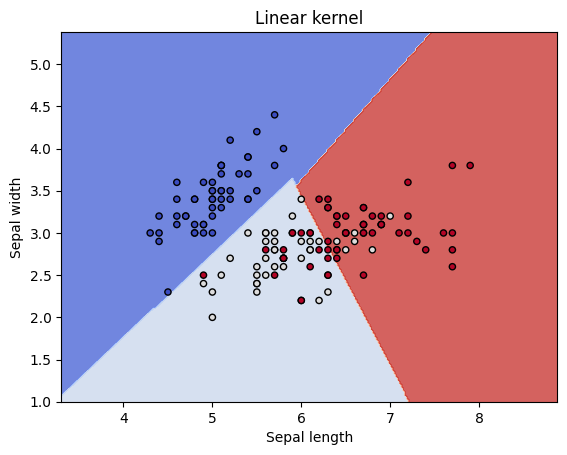

Accuracy: 82.67%


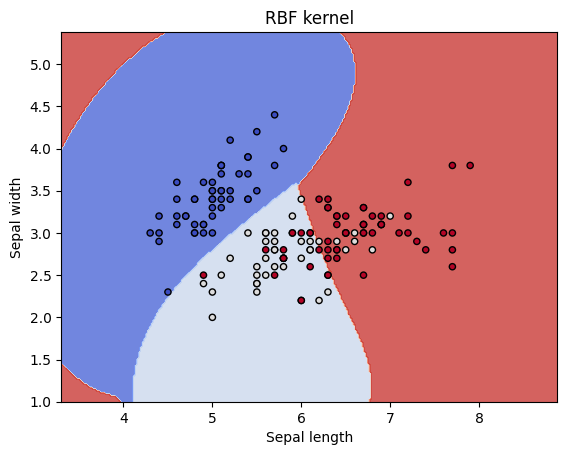

Accuracy: 81.33%


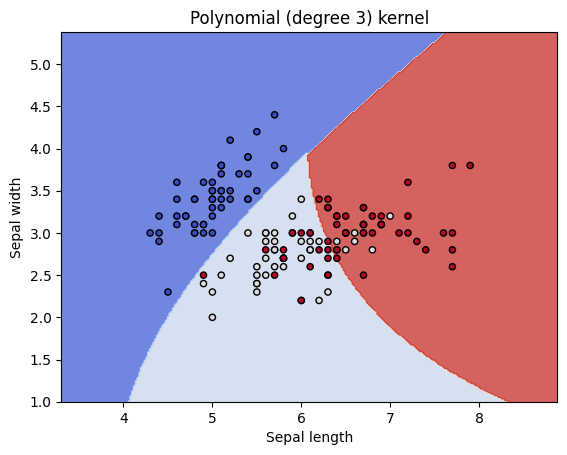

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#take the well-known iris dataset
iris = datasets.load_iris()
#we will use only sepal length and width
features=iris.data[:, :2]
classes=iris.target

#plot points
x1, x2=features[:, 0], features[:, 1]
x_min, x_max=x1.min()-1, x1.max()+1
y_min, y_max=x2.min()-1, x2.max()+1
h=0.02
plot_x, plot_y=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#regularization
C=1.0  
models=(svm.SVC(kernel="linear", C=C),
          svm.SVC(kernel="rbf", gamma=0.7, C=C),
          svm.SVC(kernel="poly", degree=3, C=C))
models=(model.fit(features, classes) for model in models)

# title for the plots
titles = ("Linear kernel", "RBF kernel", "Polynomial (degree 3) kernel")


for model, title in zip(models, titles):
    points=model.predict(np.c_[plot_x.ravel(), plot_y.ravel()]).reshape(plot_x.shape)
    plt.contourf(plot_x, plot_y, points, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.xlim(plot_x.min(), plot_x.max())
    plt.ylim(plot_y.min(), plot_y.max())
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    
    predicted=model.predict(features);
    print("Accuracy: %.2lf%%"%(100*np.sum(classes==predicted)/classes.size))
    
    plt.scatter(x1, x2, c=classes, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    
    plt.show()

**Tasks**

1. What accuracies are achieved when other two features of the iris dataset are used?
2. Split the iris dataset into a training and testing part with the ratio 70/30, fit the SVM model with different kernels on the training part, and test it on the testing part. Which kernel gives the highest accuracy? Take care of the target class distribution in the training/testing part.
3. Make the code below give over 90% accuracy.

Accuracy: 96.67%


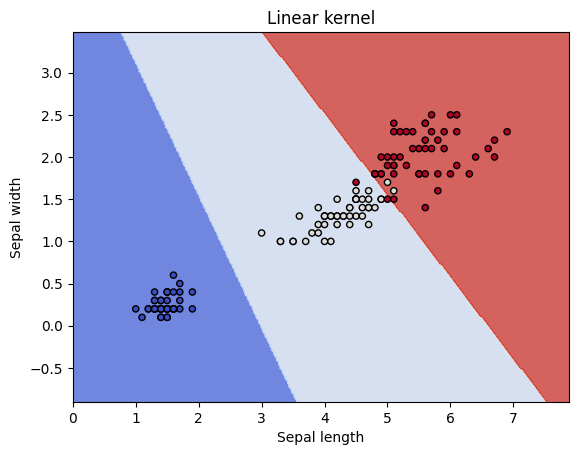

Accuracy: 96.67%


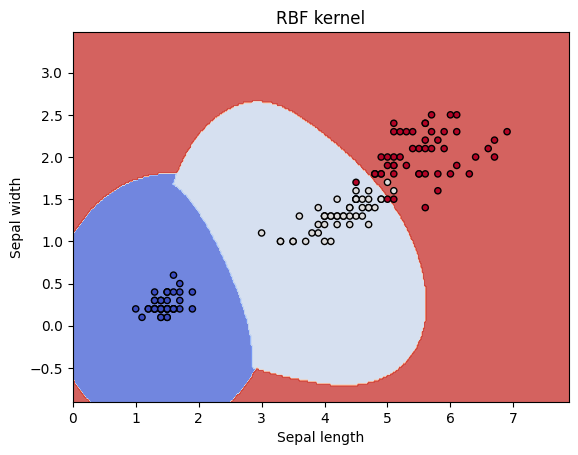

Accuracy: 96.67%


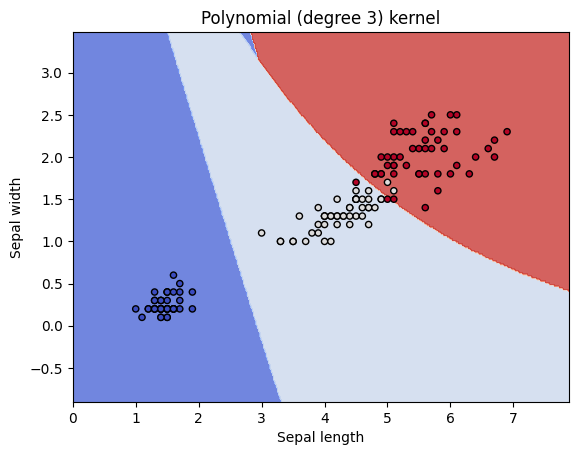

In [195]:
#1

features = iris.data[:, 2:4]
classes=iris.target

#plot points
x1, x2=features[:, 0], features[:, 1]
x_min, x_max=x1.min()-1, x1.max()+1
y_min, y_max=x2.min()-1, x2.max()+1
h=0.02
plot_x, plot_y=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#regularization
C=1.0  
models=(svm.SVC(kernel="linear", C=C),
          svm.SVC(kernel="rbf", gamma=0.7, C=C),
          svm.SVC(kernel="poly", degree=3, C=C))
models=(model.fit(features, classes) for model in models)

# title for the plots
titles = ("Linear kernel", "RBF kernel", "Polynomial (degree 3) kernel")


for model, title in zip(models, titles):
    points=model.predict(np.c_[plot_x.ravel(), plot_y.ravel()]).reshape(plot_x.shape)
    plt.contourf(plot_x, plot_y, points, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.xlim(plot_x.min(), plot_x.max())
    plt.ylim(plot_y.min(), plot_y.max())
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    
    predicted=model.predict(features);
    print("Accuracy: %.2lf%%"%(100*np.sum(classes==predicted)/classes.size))
    
    plt.scatter(x1, x2, c=classes, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    
    plt.show()

Accuracy: 67.00%


In [196]:
#2
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size=0.3, random_state=42)

# Define different kernel types
kernels = ["linear", "rbf", "poly"]

# Fit SVM models with different kernels and check accuracy
best_kernel = None
best_accuracy = 0

for kernel in kernels:
    model = svm.SVC(kernel=kernel, C=C)
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    accuracy = 100 * np.sum(y_test == predicted) / y_test.size
    
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}%")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f"The best kernel is {best_kernel} with accuracy {best_accuracy:.2f}%")


Kernel: linear, Accuracy: 100.00%
Kernel: rbf, Accuracy: 100.00%
Kernel: poly, Accuracy: 100.00%
The best kernel is linear with accuracy 100.00%


In [200]:
#3
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV


n1=400
n2=400

class1=(np.tile(np.random.uniform(low=0.0, high=1, size=n2).reshape((n2, 1)), (1, 2))+3/2)*\
np.array([(np.cos(a), np.sin(a)) for a in np.random.uniform(low=2, high=8, size=n2)])+np.tile(np.array([[3/2, 0]]), (n1, 1))

class2=(np.tile(np.random.uniform(low=0.0, high=1, size=n2).reshape((n2, 1)), (1, 2))+3/2)*\
np.array([(np.cos(a), np.sin(a)) for a in np.random.uniform(low=-1, high=4, size=n2)])
x=np.vstack((class1, class2))
y=np.concatenate((np.ones((n1)), 2*np.ones((n2))))

idx=np.random.permutation(y.size)

x=x[idx, :]
y=y[idx]

s=round((n1+n2)/2)

x_train=x[:s, :]
y_train=y[:s]

x_test=x[s:, :]
y_test=y[s:]

model = svm.SVC(kernel="poly", degree=2, C=1)
model.fit(x_train, y_train)

predicted=model.predict(x_test)
print("Accuracy: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))

# Define a range of hyperparameters to search
param_grid = {
    'kernel': ['poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
predicted = best_model.predict(x_test)
accuracy = 100 * np.sum(y_test == predicted) / y_test.size
print(f"Best Model Accuracy: {accuracy:.2f}%, Parameters: {grid_search.best_params_}")


Accuracy: 75.50%
Best Model Accuracy: 94.00%, Parameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}


## 6.2 Wine dataset
Here we are going to make some experiments with the wine dataset to see how features can [affect](https://en.wikipedia.org/wiki/Feature_selection) the classification.

**Tasks**

1. Which SVM kernel will achieve the highest accuracy when all features are used?
2. If you can use **only one** feature and any kernel to achieve highest possible accuracy, which feature and kernel would that be?
3. If you can use **only two** features and any kernel to achieve highest possible accuracy, which feature and kernel would that be?
4. How do you explain the results?

In [209]:
from sklearn.datasets import load_wine
wine=load_wine()
x=wine.data
y=wine.target
idx=np.random.permutation(y.size)
x=x[idx, :]
y=y[idx]

#all features
features_idx=range(x.shape[1])
#only some of the features
#features_idx=[0, 1]

x=x[:, features_idx]

s=round(y.size/2)

x_train=x[:s, :]
y_train=y[:s]

x_test=x[s:, :]
y_test=y[s:]

model=svm.SVC()
model.fit(x_train, y_train)

predicted=model.predict(x_test)
print("Accuracy: %.2lf%%"%(100*np.sum(y_test==predicted)/y_test.size))





Accuracy: 59.55%
Best Feature for One Feature: 6 (Kernel: linear) (Accuracy: 79.78%)


In [213]:
from sklearn.svm import SVC

# Create SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
best_accuracy = 0
best_kernel = ''

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    accuracy = 100 * np.sum(y_test == predicted) / y_test.size
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f"Best Kernel for All Features: {best_kernel} (Accuracy: {best_accuracy:.2f}%)")

best_feature = None
best_kernel_one_feature = ''
best_accuracy_one_feature = 0

for feature_index in range(x_train.shape[1]):
    x_train_one_feature = x_train[:, feature_index].reshape(-1, 1)
    x_test_one_feature = x_test[:, feature_index].reshape(-1, 1)
    
    for kernel in kernels:
        model = SVC(kernel=kernel)
        model.fit(x_train_one_feature, y_train)
        predicted = model.predict(x_test_one_feature)
        accuracy = 100 * np.sum(y_test == predicted) / y_test.size
        if accuracy > best_accuracy_one_feature:
            best_accuracy_one_feature = accuracy
            best_feature = feature_index
            best_kernel_one_feature = kernel

print(f"Best Feature for One Feature: {best_feature} (Kernel: {best_kernel_one_feature}) (Accuracy: {best_accuracy_one_feature:.2f}%)")


best_features = None
best_kernel_two_features = ''
best_accuracy_two_features = 0

for feature1 in range(x_train.shape[1] - 1):
    for feature2 in range(feature1 + 1, x_train.shape[1]):
        x_train_two_features = x_train[:, [feature1, feature2]]
        x_test_two_features = x_test[:, [feature1, feature2]]
        
        for kernel in kernels:
            model = SVC(kernel=kernel)
            model.fit(x_train_two_features, y_train)
            predicted = model.predict(x_test_two_features)
            accuracy = 100 * np.sum(y_test == predicted) / y_test.size
            if accuracy > best_accuracy_two_features:
                best_accuracy_two_features = accuracy
                best_features = (feature1, feature2)
                best_kernel_two_features = kernel

print(f"Best Features for Two Features: {best_features} (Kernel: {best_kernel_two_features}) (Accuracy: {best_accuracy_two_features:.2f}%)")





Best Kernel for All Features: linear (Accuracy: 93.26%)
Best Feature for One Feature: 6 (Kernel: linear) (Accuracy: 79.78%)
Best Features for Two Features: (0, 6) (Kernel: poly) (Accuracy: 92.13%)


4. Rezultate možemo objasniti utjecajem različitih značajki na zadatku klasifikacije. Neki atributi mogu biti informativniji od drugih, a izbor jezgre također može utjecati na performanse modela. Najbolja kombinacija značajki i jezgre određuje se pronalaženjem kombinacije koja vodi do najviše točnosti na testnom skupu podataka. Točnost ovisi o tome koliko dobro značajke razdvajaju klase, a izbor jezgre određuje granicu odlučivanja koju koristi SVM.

## 6.3 Speed
SVM is really great, but it has an important disadvantage with respect to neural networks in general. Here we are going to demonstrate it.

**Tasks**
1. Run the code below for various dataset sizes and each time store the time needed for the model to fit.
2. Draw a plot that shows the influence of dataset size on execution time.
3. How would you model the influence?

In [215]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets

def create_data(n1, n2):
    class1=np.c_[np.random.normal(0, 1, size=n1), np.random.normal(0, 1, size=n1)]
    class2=np.c_[np.random.normal(2, 1, size=n2), np.random.normal(0, 1, size=n2)]
    x=np.vstack((class1, class2))
    y=np.concatenate((np.ones((n1)), 2*np.ones((n2))))
    
    return x, y

x, y=create_data(5000, 5000)

import time;
start=time.time()
model.fit(x, y)
end=time.time()
t=end-start
print(t)

1.0319492816925049


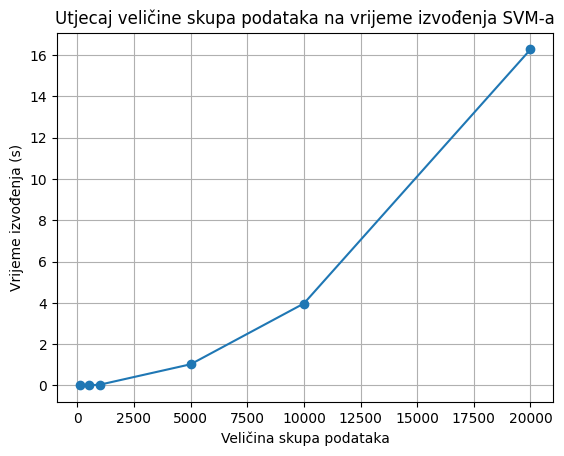

In [216]:
dataset_sizes = [100, 500, 1000, 5000, 10000, 20000]

# Lista za pohranu vremena izvođenja
execution_times = []

for size in dataset_sizes:
    x, y = create_data(size, size)
    
    # Inicijalizacija SVM modela
    model = svm.SVC()
    
    # Mjerimo vrijeme izvođenja
    start = time.time()
    model.fit(x, y)
    end = time.time()
    
    # Dodajemo vrijeme izvođenja u listu
    execution_times.append(end - start)

# Crtanje grafikona
plt.plot(dataset_sizes, execution_times, marker='o')
plt.title('Utjecaj veličine skupa podataka na vrijeme izvođenja SVM-a')
plt.xlabel('Veličina skupa podataka')
plt.ylabel('Vrijeme izvođenja (s)')
plt.grid(True)
plt.show()

graf pokazuje nelinearnu zavisnost između veličine skupa podataka i vremena izvođenja